# Students
### Mehmet Semih BABACAN 18069040
### Huzeyfe ÇAKIRKÜÇÜK 18069904
### Ahmet Akif KAYA 19061902

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Looking into Data

In [2]:
df = pd.read_excel("dataset.xlsx")

In [3]:
df[df["Y"].isnull()] # look at wich values to be seperated

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
1000,1001,1.854243,-0.078425,-2.090437,2.184340,0.088056,-1.093213,-0.563775,-1.065315,-0.890131,0.178358,NaN
1001,1002,0.207726,-0.518698,-2.986479,0.136216,-1.650902,2.028340,-0.283361,-1.535706,0.308848,-0.498566,NaN
1002,1003,-1.345787,-0.020362,0.532323,0.933127,-2.312780,3.309761,-1.418036,0.326152,-1.444867,1.624674,NaN
1003,1004,0.419527,-1.469835,0.611746,1.312737,-1.931846,-0.814779,0.243534,1.088939,0.018016,-0.352842,NaN
1004,1005,1.132712,-1.270035,2.537856,-1.531807,1.352672,1.757937,-0.148902,0.627829,1.301874,-0.365061,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,-0.861903,-0.072287,3.832280,1.420406,-0.891558,2.168405,-2.235014,-2.633568,-0.983089,2.963437,NaN
1096,1097,0.794255,0.057944,1.697445,-0.944967,1.428967,-0.931759,-1.648163,1.224257,1.453628,-2.741035,NaN
1097,1098,0.161319,-0.459021,-0.871331,-0.732429,3.070956,-1.446839,0.164837,2.107883,0.040308,-0.451266,NaN
1098,1099,-0.382850,0.413561,2.142973,2.118727,2.123478,0.728736,-3.868151,0.981317,0.868770,-1.455225,NaN


In [4]:
df_prediction = df.iloc[1000:, :] # non values for Y
df_use = df.iloc[:1000, :]

In [5]:
df_use.isnull().sum() # no NULL data

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
Y             0
dtype: int64

C:\Users\semih\miniconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


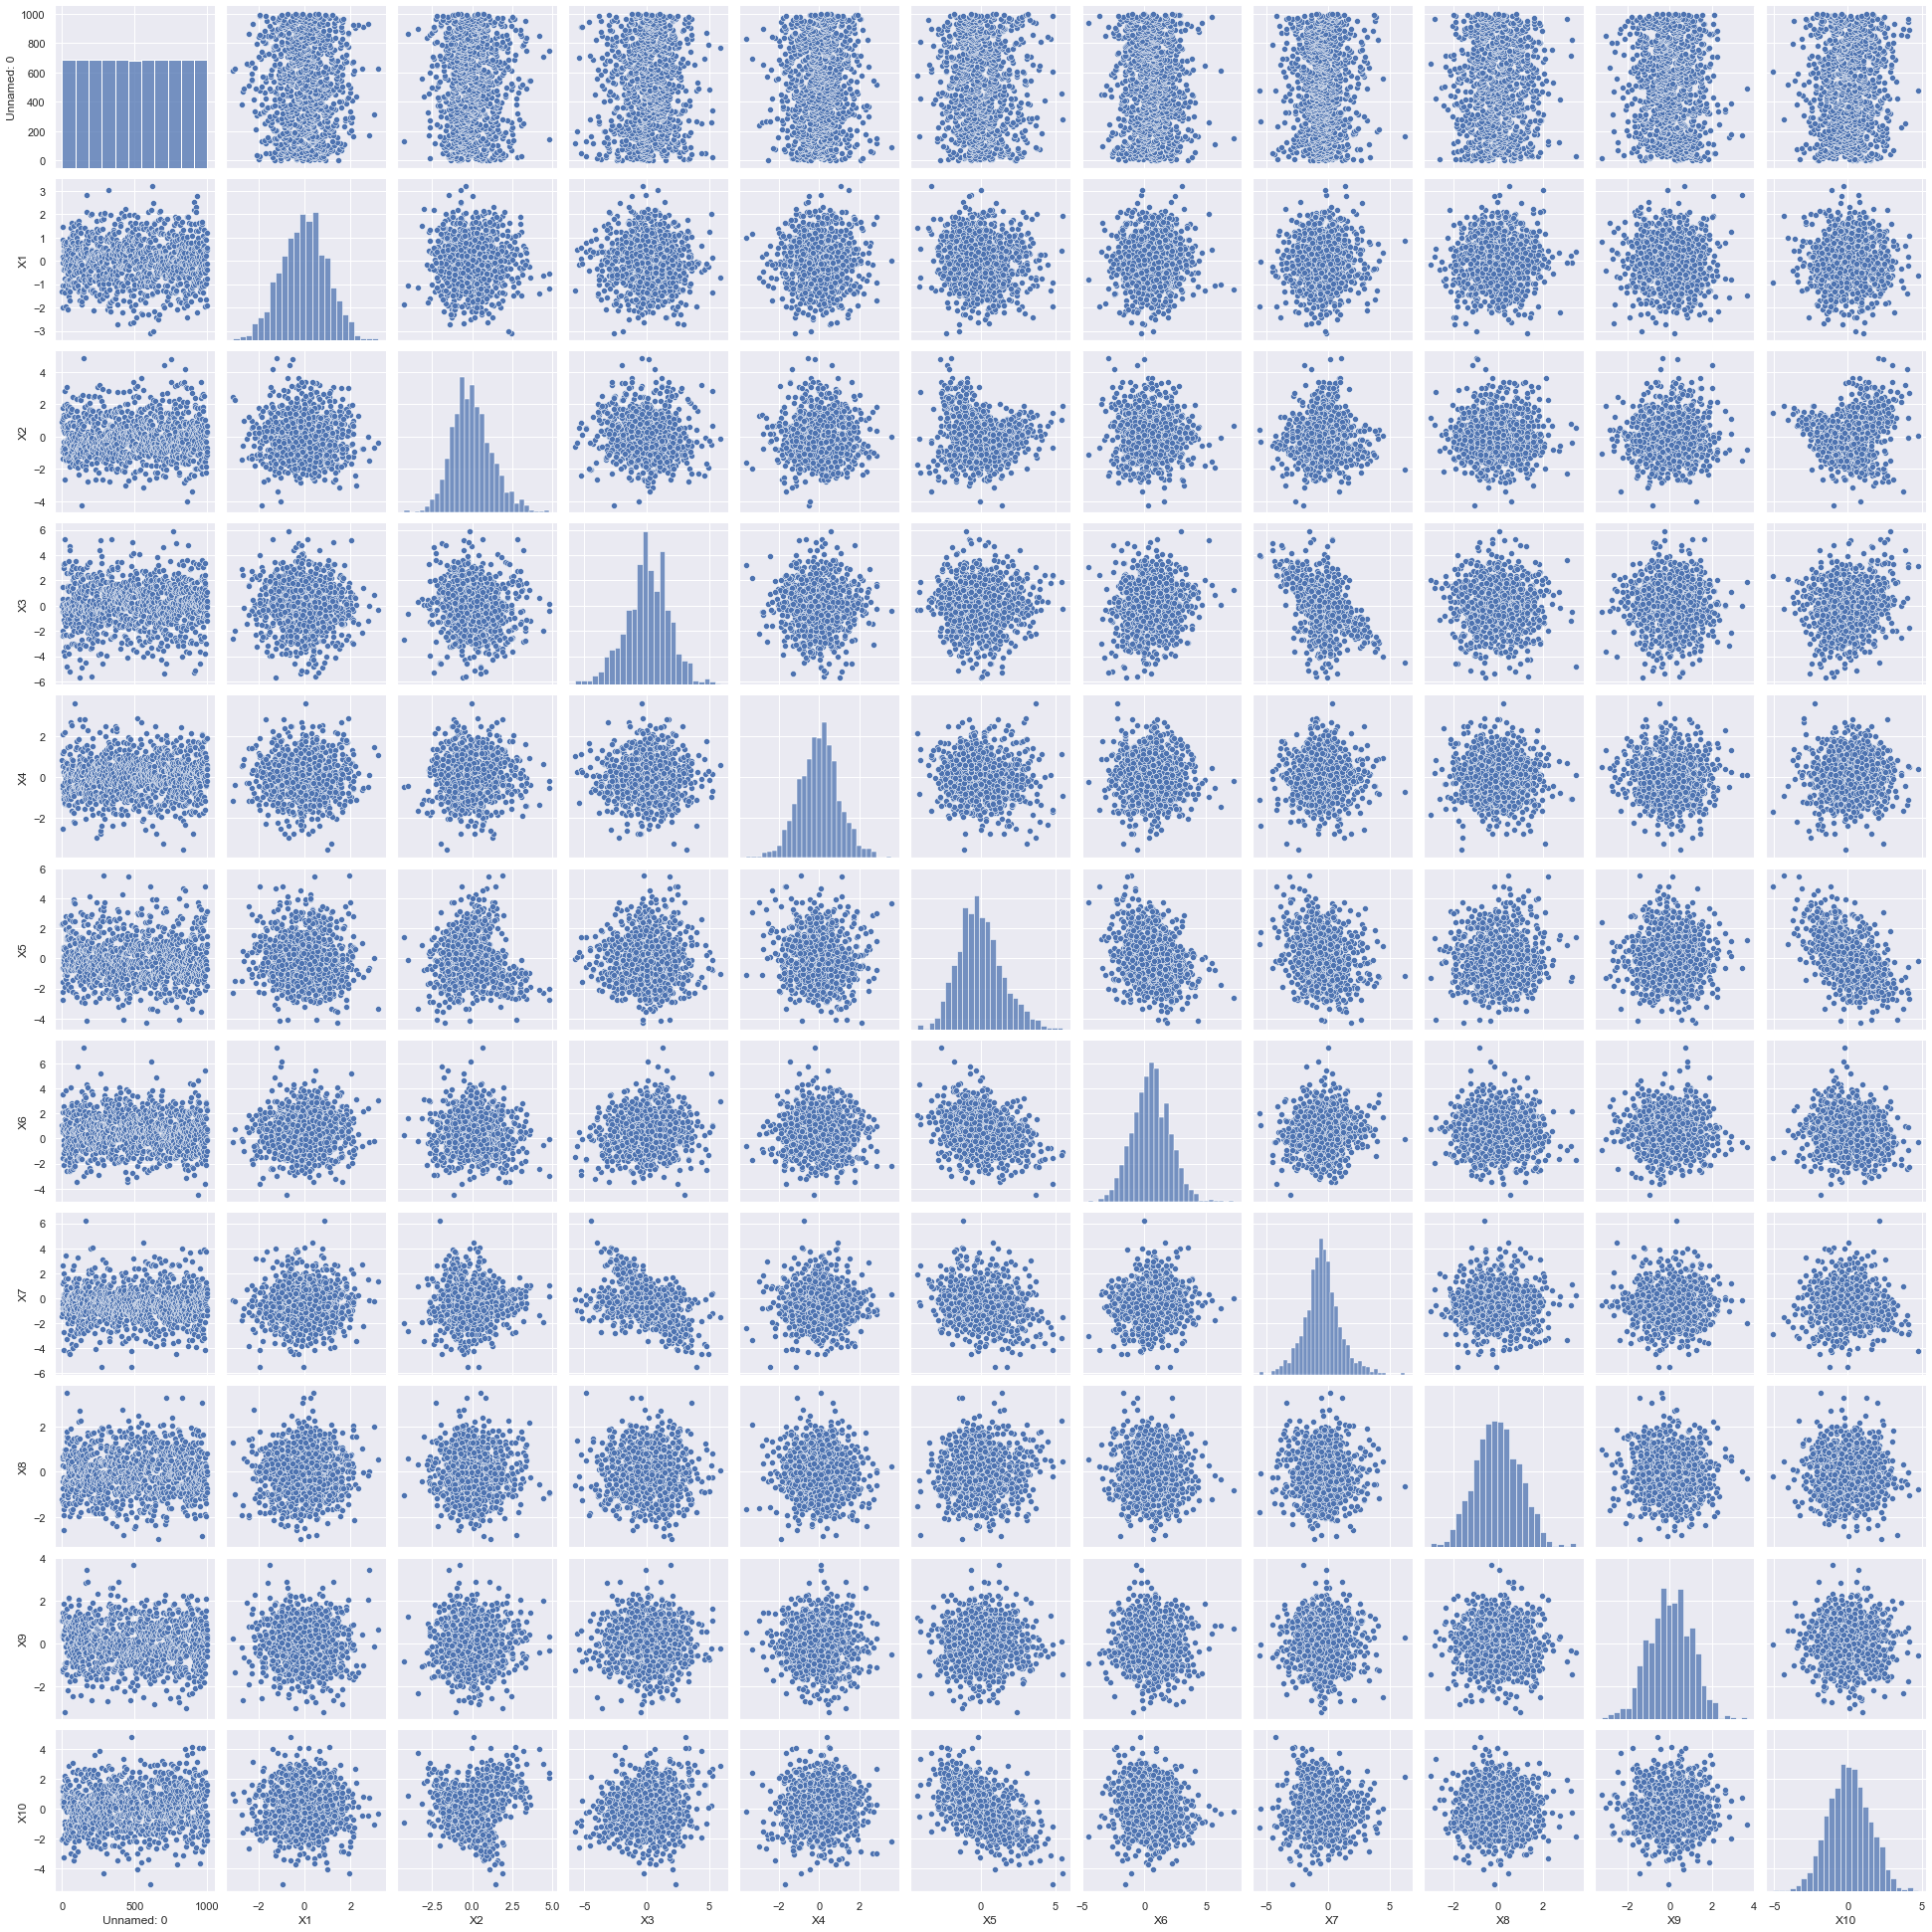

In [54]:
sns.set()
sns.pairplot(df_use_X, size = 2.5)
plt.show();

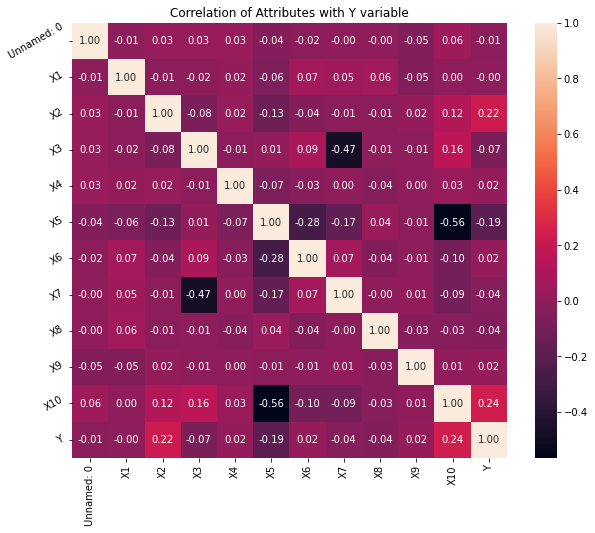

In [6]:
correlation = df_use.corr()
plt.figure(figsize=(10,8)) # I believe that I have enough small data to look at the correlation
plt.title('Correlation of Attributes with Y variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [7]:
correlation['Y'].sort_values(ascending=False) # there is low correlation rates between the cols
# it is okey for classification task

Y             1.000000
X10           0.239541
X2            0.223473
X6            0.021639
X9            0.018907
X4            0.015875
X1           -0.003760
Unnamed: 0   -0.010019
X7           -0.038780
X8           -0.042527
X3           -0.073881
X5           -0.190663
Name: Y, dtype: float64

In [8]:
df_use_X = df_use.iloc[:, :-1]
df_use_Y = df_use.iloc[:, -1]

In [9]:
def get_scores(X, Y):
    print("F-score", f1_score(X, Y))
    print("Precision", precision_score(X, Y))
    print("Accuracy", accuracy_score(X, Y))
    print("Recall", recall_score(X, Y))

# Preprocessing the Data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df_use_X, df_use_Y, test_size=0.2, random_state=42) # split the data as usual

In [11]:
# st_scaler = StandardScaler() # I decided to perform StandardScaler
st_scaler = MinMaxScaler() # I decided to perform MinMaxScaler

X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=df_use_X.columns)
X_test = pd.DataFrame(X_test, columns=df_use_X.columns)

# Training a normal KNN Model

In [12]:
# We are going to try to train a normal KNN to see the results 
knn_model = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto") 
knn_model.fit(X_train, Y_train)
knn_predicts = knn_model.predict(X_test)
print(knn_model.score(X_train, Y_train))
print(knn_model.score(X_test, Y_test))
get_scores(knn_predicts, Y_test)

knn_cv = KNeighborsClassifier(n_neighbors=3, weights="uniform", algorithm="auto")
print(cross_val_score(knn_cv, df_use_X, df_use_Y, cv=5, scoring="accuracy"))

0.8025
0.605
F-score 0.5863874345549738
Precision 0.6086956521739131
Accuracy 0.605
Recall 0.5656565656565656
[0.51  0.48  0.45  0.485 0.515]


# Finding the best model using GridSearchCV for KNN

In [13]:
# gridseach cv is quite important to decide on a model
from sklearn.model_selection import GridSearchCV # search for the best neigbor from a set of values
# because previously we have chosen only for the 
import numpy as np

knn2 = KNeighborsClassifier()

parameter_grid = {'n_neighbors': np.arange(1, 100)}
knn_gscv = GridSearchCV(knn2, parameter_grid, cv=5, n_jobs=-1)
#fit model to data
knn_gscv.fit(df_use_X, df_use_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [14]:
knn_gscv.best_params_

{'n_neighbors': 68}

In [15]:
knn_gscv.best_score_

0.527

In [16]:
knn = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_["n_neighbors"], weights="uniform", algorithm="auto")
knn.fit(X_train, Y_train)
print("training score", knn.score(X_train, Y_train))
print("test score", knn.score(X_test, Y_test))
get_scores(knn.predict(X_test), Y_test)

training score 0.6925
test score 0.635
F-score 0.6666666666666666
Precision 0.7934782608695652
Accuracy 0.635
Recall 0.5748031496062992


In [17]:
# SVM with linear
grid_for_KNN = {
                  "n_neighbors": range(3, 50),
                  "leaf_size": range(10, 70, 5),
                  "p": range(1, 4),
                  "weights": ["distance", "uniform"]}
             
knn3 = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn3, grid_for_KNN, cv=5, scoring="accuracy", n_jobs=-1)
knn_gscv2.fit(df_use_X, df_use_Y)
knn_gscv2.best_score_

0.554

In [18]:
knn_model_from_gridcv = knn_gscv2.best_estimator_ # let's choose the best model amongs the others
knn_model_from_gridcv.fit(X_train, Y_train)
knn_best_preds = knn_model_from_gridcv.predict(X_test)
print("training score", knn_model_from_gridcv.score(X_train, Y_train))
print("test score", knn_model_from_gridcv.score(X_test, Y_test))

get_scores(knn_best_preds, Y_test)

training score 0.72
test score 0.64
F-score 0.6470588235294118
Precision 0.717391304347826
Accuracy 0.64
Recall 0.5892857142857143


# Finding the best model for Logistic Regression using GridSearchCV

In [19]:
# logistic regression
lg_regression = LogisticRegression(max_iter=200)
lg_regression.fit(X_train, Y_train)

get_scores(lg_regression.predict(X_test), Y_test)
print("Training score", lg_regression.score(X_train, Y_train))
print("Test score", lg_regression.score(X_test, Y_test))
print(cross_val_score(lg_regression, df_use_X, df_use_Y, cv=5, scoring="accuracy"))
get_scores(lg_regression.predict(X_train), Y_train)

print()
grid_for_lg={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lg_regression2 = LogisticRegression(max_iter=200)
lg_grid = GridSearchCV(lg_regression2, grid_for_lg, cv=5, scoring="accuracy", n_jobs=-1)
lg_grid.fit(df_use_X, df_use_Y)
print("best grid search cv score:", lg_grid.best_score_)

print()
lg_best = lg_grid.best_estimator_
lg_best.fit(X_train, Y_train)
lg_best_predicts = lg_best.predict(X_test)
print("Training score", lg_best.score(X_train, Y_train))
print("Test score", lg_best.score(X_test, Y_test))
get_scores(lg_best_predicts, Y_test)


F-score 0.6203208556149733
Precision 0.6304347826086957
Accuracy 0.645
Recall 0.6105263157894737
Training score 0.65875
Test score 0.645
[0.6   0.61  0.655 0.665 0.68 ]
F-score 0.6690909090909091
Precision 0.6524822695035462
Accuracy 0.65875
Recall 0.6865671641791045

best grid search cv score: 0.645

Training score 0.65625
Test score 0.665
F-score 0.6417112299465241
Precision 0.6521739130434783
Accuracy 0.665
Recall 0.631578947368421


C:\Users\semih\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\semih\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\semih\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\semih\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(


# Finding the best model for Support Vector Classification with kernel=RBF using GridSearchCV  

In [35]:
# As it takes longer time to train with increased parameter amounts, I will try to keep the amount low arbitrarily
# For having both linear and rbf SVC types, I need to have 2 different parameter dictionaries
grid_for_SVC_rbf = {
                  'gamma': ['auto', 0.001, 0.01, 0.1],
                  'C': np.linspace(0.0001, 100, 5),
                  # 'kernel': ['rbf','linear'],
                  'kernel':["rbf"],
                  'probability':[True]
               }

             
SVC_model = SVC()
svc_grid_rbf = GridSearchCV(SVC_model, grid_for_SVC_rbf, cv=5, scoring="accuracy", n_jobs=-1)
svc_grid_rbf.fit(df_use_X, df_use_Y)
print(svc_grid_rbf.best_score_)
svc_rbf_best = svc_grid_rbf.best_estimator_
svc_rbf_best.fit(X_train, Y_train)
print("training score", svc_rbf_best.score(X_train, Y_train))
print("test score", svc_rbf_best.score(X_test, Y_test))
get_scores(svc_rbf_best.predict(X_test), Y_test)


0.515
training score 0.52875
test score 0.46
F-score 0.6301369863013699
Precision 1.0
Accuracy 0.46
Recall 0.46


# Finding the best model for Support Vector Classification with kernel=Linear using GridSearchCV  

In [43]:
grid_for_SVC_linear = {
                  'C': [0.01, 0.1, 1],
                  # 'kernel': ['rbf','linear'],
                  'kernel':["linear"],
                  'probability':[True]
               }

SVC_model = SVC()
svc_grid_linear = GridSearchCV(SVC_model, grid_for_SVC_linear, cv=5, scoring="accuracy", n_jobs=-1)
svc_grid_linear.fit(df_use_X, df_use_Y)
print(svc_grid_linear.best_score_)
svc_linear_best = svc_grid_linear.best_estimator_
svc_linear_best.fit(X_train, Y_train)
print("training score", svc_linear_best.score(X_train, Y_train))
print("test score", svc_linear_best.score(X_test, Y_test))
get_scores(svc_linear_best.predict(X_test), Y_test)

0.6530000000000001
training score 0.605
test score 0.565
F-score 0.6297872340425532
Precision 0.8043478260869565
Accuracy 0.565
Recall 0.5174825174825175


# Giving a Decision Based on the Acquired Scores

Based on the the best models for each of the different methods with GRID Search Cross Validaion, I trained lots of models
But will chose 5 different models amongst them

The bests for each:
F-score - Precision - Accuracy - Recall
<ol>
    <li>KNN_normal 0.6666666666666666 - 0.7934782608695652 - 0.635 - 0.5748031496062992
    <li>KNN_best 0.6470588235294118 - 0.717391304347826 - 0.64 - 0.5892857142857143
    <li>Logisctic Regression_best 0.6417112299465241 - 0.6521739130434783 - 0.665 - 0.631578947368421
    <li>SVC with Linear_best 0.6297872340425532 - 0.8043478260869565 - 0.565 - 0.5174825174825175
    <li>SVC with RFB_best 0.6301369863013699 - 1.0 - 0.46 - 0.46
</ol>

We have chosen the Logistic KNN_best model.
Since it has one of the highest F1 Score and Accuracy, we though that it would be wise to choose this model.
The predictions for it are listed below

In [53]:
df_prediction_X = df_prediction.iloc[:, :-1]
final_predictions = knn_gscv2.predict(df_prediction_X)
final_predictions = [int(i) for i in final_predictions]
print(*final_predictions, sep="\n")

with open("results.txt", "w") as m_file:
    for item in final_predictions:
        m_file.writelines(str(int(item)) + "\n")

0
1
1
0
1
0
0
0
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
1
1
0
1
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
0
1
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
0
1
1
0
0
0
1
